In [3]:
# Dataset: paribas.csv, satandar.csv
# location: https://mitu.co.in/dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('datasets/satandar.csv', nrows=40000)
df.shape

(40000, 371)

In [6]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
x = df.drop('TARGET', axis= 1)
x.shape

(40000, 370)

In [8]:
z = np.array([6,5,4,3,6,7,8,9])

In [9]:
z.var()

3.5

In [10]:
np.mean((z- z.mean())**2)

3.5

In [11]:
z = np.zeros(8) + 5

In [12]:
z

array([5., 5., 5., 5., 5., 5., 5., 5.])

In [13]:
z.var()

0.0

## Variance Threshold

In [14]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0)
vt.fit(x)

VarianceThreshold(threshold=0)

In [15]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [16]:
sum(vt.get_support())

320

In [17]:
x_new = x.iloc[:, vt.get_support() ]
x_new.shape

(40000, 320)

In [18]:
# Dublicated Feature Remmoval

In [19]:
x.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [20]:
xt = x.T

In [21]:
xt.shape

(370, 40000)

In [22]:
xt.duplicated()

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace2    False
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
Length: 370, dtype: bool

In [23]:
sum(xt.duplicated())

79

In [24]:
xt.drop_duplicates(inplace= True)

In [25]:
x = xt.T

In [26]:
x.shape

(40000, 291)

# Remove Corelated features

In [27]:
a = np.array([12,34,45,51,57,67,78,89,93,95])
b=np.array([5,9,11,16,23,31,37,51,44,50])
c=np.array([56,54,34,48,33,21,11,16,5,2])
d=np.array([67,65,34,27,54,33,67,44,27,53])

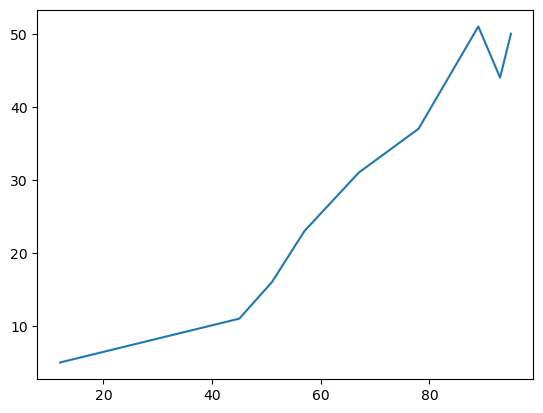

In [28]:
plt.plot(a, b)

In [29]:
np.corrcoef(a, b)

array([[1.        , 0.96433974],
       [0.96433974, 1.        ]])

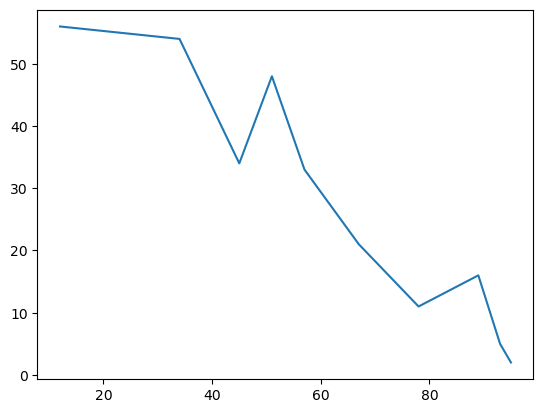

In [30]:
plt.plot(a, c)

In [31]:
np.corrcoef(a, c)  ### here -94% that means direct correlation is present

array([[ 1.       , -0.9457024],
       [-0.9457024,  1.       ]])

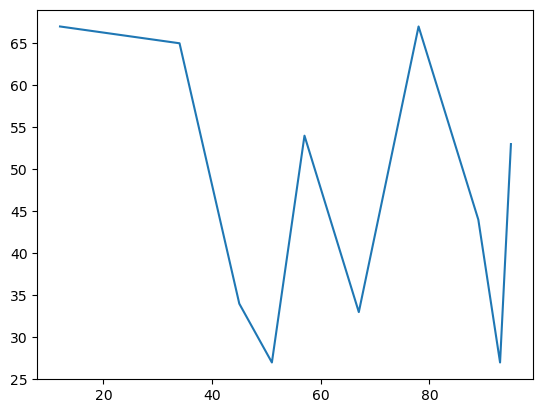

In [32]:
plt.plot(a,d)

In [33]:
np.corrcoef(a, d) ### here -33% that means no direct correlation is present

array([[ 1.        , -0.33616692],
       [-0.33616692,  1.        ]])

In [34]:
df = pd.read_csv('datasets/paribas.csv')

In [35]:
df


,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AL,NaN,NaN,NaN,0,NaN,NaN
114317,228710,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,E,NaN,NaN,NaN,1,NaN,NaN
114318,228711,1,NaN,NaN,C,NaN,10.069277,NaN,NaN,0.323324,...,NaN,NaN,0.156764,Q,NaN,NaN,2.417606,2,NaN,NaN
114319,228712,1,NaN,NaN,C,NaN,10.106144,NaN,NaN,0.309226,...,NaN,NaN,0.490658,BW,NaN,NaN,3.526650,0,NaN,NaN


In [36]:
df = pd.read_csv('datasets/paribas.csv', nrows=20000)

In [37]:
df.shape

(20000, 133)

In [38]:
x = df.drop('target', axis=1)

In [39]:
x.shape

(20000, 132)

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 20.1+ MB


In [41]:
cols = ['int64', 'float64']

In [42]:
numerical_columns = list(x.select_dtypes(include=cols).columns)

In [43]:
numerical_columns

['ID',
 'v1',
 'v2',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v23',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v32',
 'v33',
 'v34',
 'v35',
 'v36',
 'v37',
 'v38',
 'v39',
 'v40',
 'v41',
 'v42',
 'v43',
 'v44',
 'v45',
 'v46',
 'v48',
 'v49',
 'v50',
 'v51',
 'v53',
 'v54',
 'v55',
 'v57',
 'v58',
 'v59',
 'v60',
 'v61',
 'v62',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v69',
 'v70',
 'v72',
 'v73',
 'v76',
 'v77',
 'v78',
 'v80',
 'v81',
 'v82',
 'v83',
 'v84',
 'v85',
 'v86',
 'v87',
 'v88',
 'v89',
 'v90',
 'v92',
 'v93',
 'v94',
 'v95',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v108',
 'v109',
 'v111',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v120',
 'v121',
 'v122',
 'v123',
 'v124',
 'v126',
 'v127',
 'v128',
 'v129',
 'v130',
 'v131']

In [44]:
x = x[numerical_columns]

In [45]:
x.shape

(20000, 113)

In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 113 entries, ID to v131
dtypes: float64(108), int64(5)
memory usage: 17.2 MB


In [47]:
correlated_features = set()
correlated_matrix = x.corr()

In [48]:
correlated_matrix

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
ID,1.000000,0.004817,0.001134,-0.003499,0.002015,-0.010675,-0.002102,-0.002202,0.000506,0.000844,...,0.017562,-0.001780,0.007956,0.001076,-0.003765,0.002461,0.001904,-0.004063,0.010092,-0.003948
v1,0.004817,1.000000,-0.205826,-0.145037,-0.049337,-0.020251,0.089950,0.160309,-0.035394,-0.006785,...,0.340779,-0.137999,0.292999,0.164169,0.025936,-0.018762,-0.010806,-0.015788,0.253119,0.709122
v2,0.001134,-0.205826,1.000000,0.542216,0.195646,0.025525,0.351704,-0.367639,-0.012757,0.055303,...,-0.571877,0.169172,-0.592534,-0.261420,-0.111644,0.011387,0.259107,0.074142,-0.576703,0.183870
v4,-0.003499,-0.145037,0.542216,1.000000,0.251530,0.387779,0.483067,-0.179696,-0.191921,0.085467,...,-0.618385,0.058058,-0.711291,-0.063270,-0.130919,0.299857,0.487635,0.109600,-0.702047,0.304914
v5,0.002015,-0.049337,0.195646,0.251530,1.000000,0.238449,0.045411,0.003512,-0.168616,0.045830,...,-0.341398,0.012811,-0.217315,0.080085,-0.102563,-0.224641,0.600132,0.045623,-0.240718,0.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v127,0.002461,-0.018762,0.011387,0.299857,-0.224641,0.169701,0.247932,-0.015149,0.123628,0.002826,...,0.017564,0.094302,-0.162525,-0.050666,-0.079944,1.000000,-0.161000,-0.001564,-0.244848,0.054744
v128,0.001904,-0.010806,0.259107,0.487635,0.600132,0.240302,0.088061,0.019486,-0.268033,0.054684,...,-0.372598,-0.043031,-0.256838,0.279839,-0.154822,-0.161000,1.000000,0.059893,-0.287794,0.243623
v129,-0.004063,-0.015788,0.074142,0.109600,0.045623,0.050278,0.041350,-0.019332,-0.035212,0.505573,...,-0.090282,0.005121,-0.101049,-0.009529,-0.024423,-0.001564,0.059893,1.000000,-0.082056,0.045038
v130,0.010092,0.253119,-0.576703,-0.702047,-0.240718,-0.304129,-0.625145,0.323090,0.084667,-0.072778,...,0.809328,-0.190182,0.727563,0.227784,0.080568,-0.244848,-0.287794,-0.082056,1.000000,-0.264040


In [49]:
# column Nmae will correlation > 80%
For i in range(len(corelated_matrix.columns)):
    for j in range(i):
        if abs(correlated_matrix.iloc[i,j]) > 0.8:
           colname = correlated_matrix.columns[i]
            correlated_features.add(colname)

SyntaxError: invalid syntax (3854171064.py, line 2)

In [50]:
len(correlated_features)

0

In [51]:
x = x.drop(correlated_features, axis=1) #it willl drop the correlated features

In [52]:
x.shape

(20000, 113)

In [53]:
# Dataset: wisc_bc_data.csv
# Location: https:/mitu.co.in/dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('datasets/wisc_bc_data.csv', nrows=40000)
df.shape

(569, 32)

In [56]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [57]:
x = df.drop(['id', 'diagnosis'], axis= 1)

In [58]:
from sklearn.feature_selection import SelectKBest, chi2

In [59]:
skf = SelectKBest(k=5, score_func= chi2)

In [60]:
skf.fit(x, df['diagnosis'])

SelectKBest(k=5, score_func=<function chi2 at 0x000001A85D52E7A0>)

In [61]:
skf.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [62]:
x.iloc[:, skf.get_support()]

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0
